In [4]:
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import numpy as np


In [5]:
# input: mu = numerology, 0/1/2 for 15/30/60 kHz
#        M  = bandwidth in RB

# processing: Y = floor( 10 log ((2^mu) M) )


# output: x = integers from 1 to M
#        pX = probabilites of X =x
#         k = integers from 0 to max(Y)
#        pY = probabilites of Y=y
#      numX = arrary element k means the numbers of X such that Y = k
#       E_Y = expected value of Y
#     MAP_Y = max probabilty of Y

def tx_predict(mu, M):
   
    x = np.linspace(1, M, M)
    x = np.int_(x)
    pX = (1/M)* np.ones(M)

    def funct_Y (x, mu):
        return np.floor(10 * np.log10 ( np.power(2, mu)*x))
    
    y = funct_Y(x, mu)
    y = np.int_(y) 
    
    k = np.linspace (0, np.max(y), np.max(y)+1)
    k = np.int_(k)
    
    left = (1/np.power (2, mu)) * np.power( 10, (k + 1) / 10)
    left = np.clip(left, -1, np.max(x) + 0.1)
    left = np.ceil(left)
    
    right = (1/np.power (2, mu)) * np.power(10, k / 10)
    right = np.ceil(right)
    
    numX = np.int_(left-right)
    assert (M ==sum(numX))
    
    pY = numX / M
    
    E_Y   = np.inner(k, pY)
    E_Y   = np.int_(np.rint(E_Y))
    MAP_Y = np. argmax(pY)
    
    
    return x, pX, k, pY, numX, E_Y, MAP_Y
          

In [6]:
x, pX, k, pY, numX, E_Y, MAP_Y = tx_predict(mu=0, M=100)
E_Y, MAP_Y

(15, 19)

In [7]:
pY[E_Y]

0.08

In [8]:
pY[MAP_Y]

0.2

In [9]:
mu=1
M=120
"{}, max BW = {}".format(mu, M)

'1, max BW = 120'

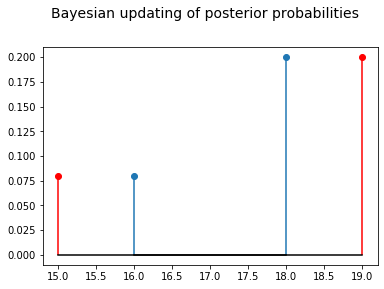

In [10]:
a = (E_Y,pY[E_Y])
b = (MAP_Y, pY[MAP_Y])
np.array((E_Y,pY[E_Y]))
np.array(b)

plt.suptitle("Bayesian updating of posterior probabilities",
             y=1.02,
             fontsize=14)

plt.stem((E_Y, MAP_Y), (pY[E_Y],pY[MAP_Y]), basefmt='k', linefmt = 'r', markerfmt='ro',use_line_collection=True)
plt.stem((E_Y+1, MAP_Y-1), (pY[E_Y],pY[MAP_Y]), basefmt='k',use_line_collection=True,)

plt.show()


In [11]:
x

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

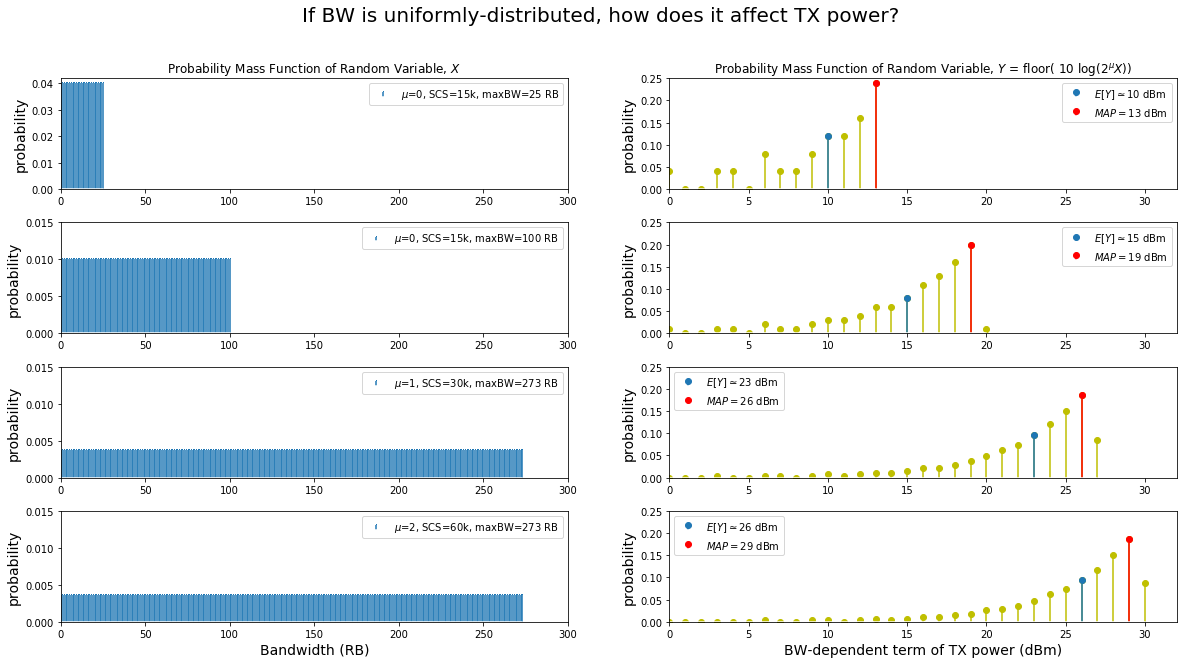

In [64]:



config = [(0,25),(0,100),(1,273),(2,273)]
#config = [(0,100),(1,273),]
#config = [(0,100),]

i = 0
N = len(config)


fig,axs= plt.subplots(N,2, sharex='all', sharey='col')
fig.set_size_inches((20,10))
plt.subplots_adjust(hspace=.3)

for mu, M in config:
 
    x, pX, k, pY, numX, E_Y, MAP_Y = tx_predict(mu, M)
   
    i+=1
    ax = plt.subplot(N, 2, i)
    ax.set_xlim([0,300]) 
    if i>1:
        ax.set_ylim([0, 0.015]) 
    else:
        ax.set_ylim([0, 0.042])
        
    plt.stem(x, pX, use_line_collection=True,  basefmt='w',  markerfmt=',', label = r'$\mu$='+ "{}, SCS={}k, maxBW={} RB".format(mu, 15 * (np.power(2,mu)), M))
    plt.ylabel("probability", fontsize=14)
    plt.legend(loc='upper right')
    
    if i == 1:
        plt.title("Probability Mass Function of Random Variable, $X$")
    if i == (2*len(config)-1):
        plt.xlabel("Bandwidth (RB)", fontsize=14)
    
    i+=1
    ax = plt.subplot(N,2,i)
    ax.set_xlim([0,32]) 
    ax.set_ylim([0,0.25]) 
    plt.stem(k, pY, basefmt='w', linefmt = 'y', markerfmt='yo', use_line_collection=True)
    plt.stem((E_Y,  ), (pY[E_Y], ), basefmt='w',  use_line_collection=True, label = '$E[Y] \simeq %d $ dBm'% E_Y)  
    plt.stem((MAP_Y,  ), (pY[MAP_Y], ), basefmt='w', linefmt = 'r', markerfmt='ro', use_line_collection=True, label='$MAP = %d$ dBm'%MAP_Y)   
    #plt.legend(loc='upper left')
    plt.legend()
    plt.ylabel("probability", fontsize=14)
    if i == 2:
        plt.title("Probability Mass Function of Random Variable, $Y$ = floor( 10 "+ '$ \log(2^\mu X)$'+")")
    
    if i == (2*len(config)):
        plt.xlabel("BW-dependent term of TX power (dBm)", fontsize=14)

 
plt.suptitle("If BW is uniformly-distributed, how does it affect TX power?",
             fontsize=20)

plt.show()